# Model with made with only sigmoid activation function

In [1]:
import sys

sys.path.append("../python")

from data import Dataloader
from models import HeuristicModelSiameseNetwork3 as HeuristicModel

# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()

model = HeuristicModel()
model.fit(X,Y)
# model.load_model_weights("./weights/heuristic_model_weights_3")




Epoch 1/50


c:\Users\romai\Documents\Centrale\Système de décision\Projet\cs-sdp-2023-24\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\romai\Documents\Centrale\Système de décision\Projet\cs-sdp-2023-24\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



1093/1093 [==============================] - 2s 1ms/step - loss: 0.5266 - val_loss: 0.4268
Epoch 2/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4510 - val_loss: 0.4285
Epoch 3/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4458 - val_loss: 0.4239
Epoch 4/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4435 - val_loss: 0.4223
Epoch 5/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4402 - val_loss: 0.4213
Epoch 6/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4402 - val_loss: 0.4309
Epoch 7/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4384 - val_loss: 0.4213
Epoch 8/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4369 - val_loss: 0.4231
Epoch 9/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4368 - val_loss: 0.4205
Epoch 10/50
1093/1093 [==============================] - 1s 1ms/step - loss: 0.4361 - val_lo

In [2]:
model.save_model_weights("./weights/heuristic_model_weights_4")

Modèles sauvegardés dans ./weights/heuristic_model_weights_4


In [3]:
model.predict_utility(X)[:3]

1251/1251 [==============================] - 1s 679us/step


array([[0.499999  , 0.5000127 , 0.73102766],
       [0.50003535, 0.50000405, 0.73020333],
       [0.50000274, 0.7305245 , 0.73099566]], dtype=float32)

In [4]:
model.predict_preference(X[:3], Y[:3])

1/1 [==============================] - 0s 16ms/step


array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 1]])

In [5]:
from metrics import PairsExplained, ClusterIntersection

pairs_explained_metric = PairsExplained()
print("Percentage of explained preferences on train data:", pairs_explained_metric.from_model(model, X, Y))

1251/1251 [==============================] - 1s 732us/step
Percentage of explained preferences on train data: 0.9975751212439378


In [6]:
cluster_intersection_metric = ClusterIntersection()
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_metric.from_model(model, X, Y,Z))

   1/1251 [..............................] - ETA: 21s

1251/1251 [==============================] - 1s 673us/step
Percentage of preferences well regrouped into clusters: 0.7479124393821558


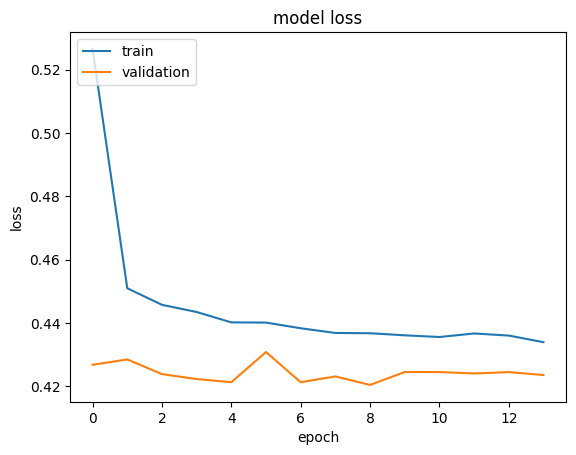

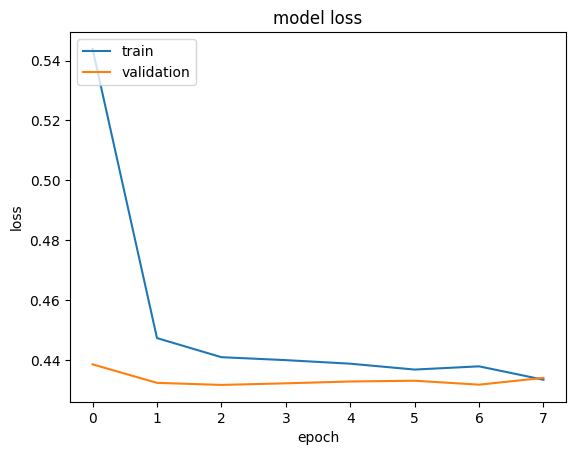

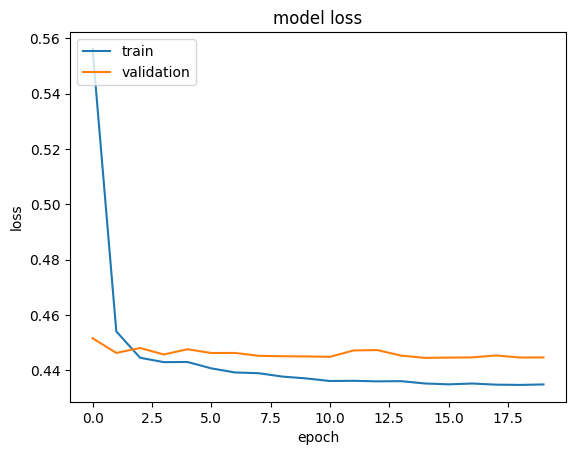

In [7]:
model.plot_history()

1251/1251 [==============================] - 1s 743us/step


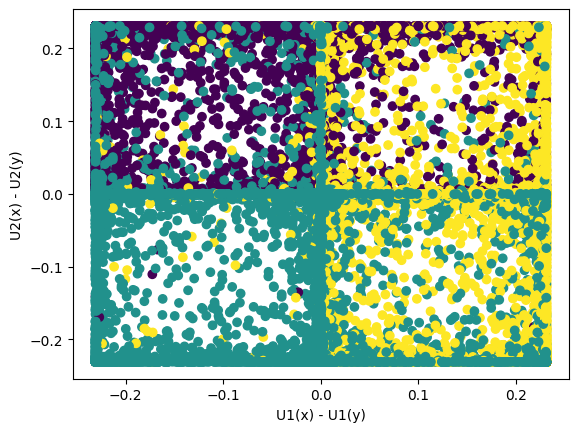

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1],
            model.predict_utility(X)[:, 2]-model.predict_utility(Y)[:, 2],
            c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()